# Finite Sampling Entropy - Binary Distributions

Suppose we estimate a distribution P(x) from a number of finite samples drawn from that distribution. How does the entropy of this estimate behave versus the number of samples?

In this document, we analyze this question for a binary distribution.

## Binary Distribution

Our distribution is as follows:

\begin{equation}
P(0) = 1 - x, P(1) = x
\end{equation}

Using n samples taken from this distribution results in the following estimate for the pdf:

\begin{equation}
P(0) = 1 - k/n, P(1) = k/n
\end{equation}

Where k is a random variable that denotes the number of successes from n samples of a binary distribution with success probability x. The entropy of our estimate is:

\begin{equation}
H(estimate) = (1 - k/n)log(1 - k/n) + (k/n)log(k/n)
\end{equation}

But since k is a random variable, our entropy is also a random variable. We can thus compute it's mean and variance.

First, we generate our underlying distribution:

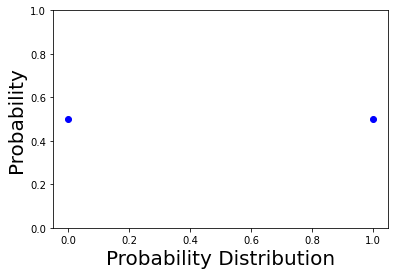

In [2]:
import numpy as np
import matplotlib.pyplot as plt

##Initialize underlying distribution
x = 0.5 
px_true = np.array([1 - x, x])

##Visualization
#fig, ax = plt.subplots(figsize=[10, 7])
plt.plot(px_true, 'bo')
plt.xlabel("Probability Distribution", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.ylim([0, 1])
plt.show()

Next, we estimate our distribution from a number of samples.

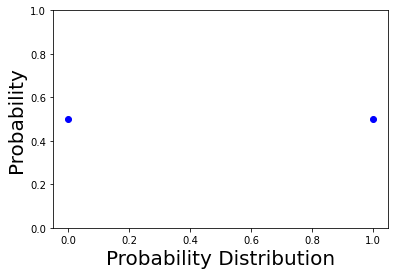

In [3]:
samples = 10

def samplefromdist(truedist):
    if np.random.rand() < truedist[0]:
        return 0
    return 1

def sampledist(truedist, samples):
    pdftest = np.zeros(len(truedist))
    for sampling in range(samples):
        pdftest[samplefromdist(truedist)] += 1
    pdftest = pdftest/sum(pdftest)
    return pdftest

px_sample = sampledist(px_true, samples)

##Visualization
plt.plot(px_sample, 'bo')
plt.xlabel("Probability Distribution", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.ylim([0, 1])
plt.show()

We can do this many times to get a distribution of distributions, and calculate the mean entropy and variance of the entropy over this distribution. However, for a binomial we know the probability of k successes already:
\begin{equation}
P(n) = \frac{n!}{k!(n - k)!}x^{k} (1 - x)^{n - k}
\end{equation}

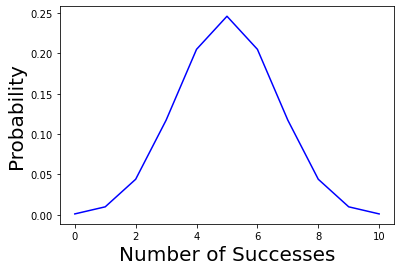

In [4]:
from math import factorial
def probnsuccess(samples, n, successprob):
    term1 = (successprob)**(n)
    term2 = (1 - successprob)**(samples - n)
    return factorial(samples)/(factorial(samples - n)*factorial(n))* term1*term2

def successprobpdfgen(samples, successprob):
    successpdfgen = np.zeros(samples + 1)
    for pop in np.arange(0,samples + 1, 1):
        successpdfgen[pop] = probnsuccess(samples, pop, successprob)
    return successpdfgen

successpdf = successprobpdfgen(samples, x)

##Visualization
plt.plot(successpdf, 'b-')
plt.xlabel("Number of Successes", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.show()

We can then calculate the mean and variance of the entropy.

In [5]:
def ent_from_samples(success, samples):
    if success == 0 or success == samples:
        return 0
    p1 = success/samples
    return -(1 - p1)*np.log2(1 - p1) - p1*np.log2(p1)

def entmoments(successpdf, samples):
    totalent = 0
    totalent2 = 0
    for successes in np.arange(0, samples +1, 1):
        totalent += ent_from_samples(successes, samples)*successpdf[successes]
        totalent2 += (ent_from_samples(successes, samples)**2)*successpdf[successes]
    return totalent, totalent2

totalent, totalent2 = entmoments(successpdf, samples)

print ("The mean entropy is ", totalent, ' compared to the actual entropy ', ent_from_samples(0.5, 1))
print ("The variance is ", totalent2 - totalent**2)

The mean entropy is  0.9234985409159915  compared to the actual entropy  1.0
The variance is  0.01205274246045418


Iterating through a number of samples, we plot the mean and variance of the entropy as a function of the number of samples.

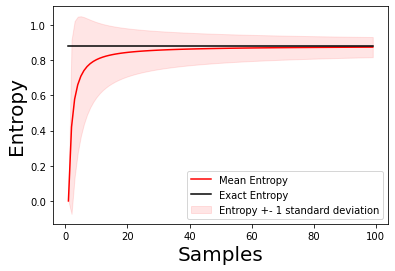

In [6]:
import numpy as np
import matplotlib.pyplot as plt

##Initialize underlying distribution
x = 0.3
px_true = np.array([1 - x, x])
samplelist = np.arange(1, 100, 1)
sampletotal = len(samplelist)

meanents = np.zeros(sampletotal)
varents = np.zeros(sampletotal)

for samplecyc in range(sampletotal):
    successpdf = successprobpdfgen(samplelist[samplecyc], x)
    totalent, totalent2 = entmoments(successpdf, samplelist[samplecyc])
    meanents[samplecyc] = totalent
    varents[samplecyc] = totalent2 - totalent*totalent
    
##Visualization
plt.plot(samplelist, meanents, 'r-', label = 'Mean Entropy')
plt.fill_between(samplelist, meanents - np.sqrt(varents), meanents + np.sqrt(varents), color = 'r', alpha = 0.1, label = 'Entropy +- 1 standard deviation')
plt.plot(samplelist, np.ones(sampletotal)*ent_from_samples(x, 1), 'k-', label = 'Exact Entropy')
plt.legend(loc='best', fontsize = 10)
plt.xlabel("Samples", fontsize = 20)
plt.ylabel("Entropy", fontsize = 20)
plt.show()

We find that the mean entropy is an underestimate of the actual entropy, but as the number of samples becomes large it approaches the actual entropy fairly quickly. Furthermore, the variance of the entropy also diminishes as the number of samples increases.

# Bounds on the Mean Entropy

Via the delta method, an approximate expression for the difference between the mean entropy and the actual entropy:

\begin{equation}
H(true) - \expval{H(estimate)} \approx \frac{0.5 K}{N}
\end{equation}

Where K is the support size of our PDF, and N is the number of samples.

In the case of our binary distribution, K = 2. Although this expression is derived under the assumption K is very large, we nontheless compare this expression to the actual differences in the entropies.

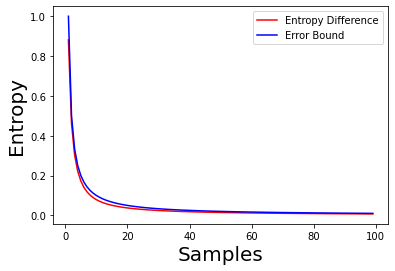

In [10]:
##Visualization
plt.plot(samplelist, ent_from_samples(x, 1) - meanents, 'r-', label = 'Entropy Difference')
plt.plot(samplelist, 0.5*2/(samplelist), 'b-', label = 'Error Bound')
plt.legend(loc='best', fontsize = 10)
plt.xlabel("Samples", fontsize = 20)
plt.ylabel("Entropy", fontsize = 20)
plt.show()

We find very good agreement between the two expressions, even though the actual conditions are not fulfilled.